# Prediction Algorithm V2
Author: Elias Le Boudec, elias.leboudec (at) epfl.ch

Date: January 17, 2019

## Abstract
This notebook implements the prediction algorithm presented in `report/report.pdf`

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pygsp
import time as timeModule
%matplotlib inline

In [2]:
# Load the data
nodes = pd.read_pickle('nodes.pkl')
edges = pd.read_pickle('terroristAttacksLocEdges.pkl')
nodes = nodes.sort_values(by=['timestamp'])

# Remove nodes without timestamp info
nodes = nodes.iloc[0:-7]

In [3]:
# Create the graph from the edges list (no isolated node included)
graph = nx.from_edgelist(edges[['node_index','node_index_2']].values)

In [4]:
# Extract the first nComponents biggest connected components
nComponents = 10
componentsNodeIds = [C for C in sorted(nx.connected_components(graph),
                                key=len, reverse=True)][0:nComponents]

In [5]:
# Build NetworkX graphs
components = [graph.subgraph(nodeIds) for nodeIds in componentsNodeIds]

In [6]:
# Rebuild the initial graph, but with only the selected components
subGraph = nx.Graph()
for C in components:
    subGraph = nx.compose(subGraph,C)

In [7]:
# Save the selection
subGraphEdgesList = list(subGraph.edges)
np.savetxt('subGraphEdgesList.csv',subGraphEdgesList,delimiter=',')

In [8]:
allComponents =  [graph.subgraph(nodeIds) for nodeIds in nx.connected_components(graph)]

In [9]:
# Prepare layout for plotting
coords = nx.spring_layout(graph,k=.25,seed=0,iterations=200)

In [10]:
# Prepare layout for plotting (subgraph)
subGraphCoords = nx.spring_layout(subGraph,k=.25,seed=0,iterations=200)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/elias/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

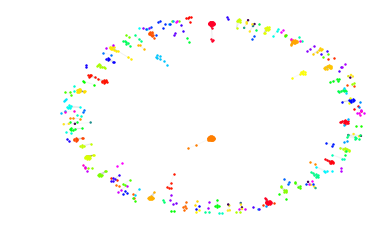

In [11]:
# Plot the full graph
cmap = plt.cm.get_cmap('gist_rainbow')
for i in range(len(allComponents)):
    nx.draw_networkx_nodes(allComponents[i],coords,node_size=2,node_color=cmap(i/len(allComponents)))
    nx.draw_networkx_edges(allComponents[i],coords,alpha=.03)
plt.axis('off')
plt.savefig('graphLoc.png',dpi=600)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/elias/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the 

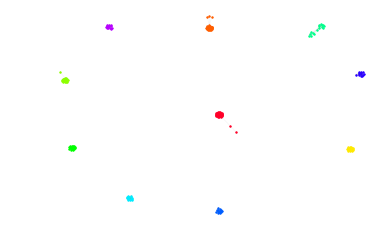

In [12]:
# Plot the components
cmap = plt.cm.get_cmap('gist_rainbow')
for i in range(len(components)):
    nx.draw_networkx_nodes(components[i],subGraphCoords,node_size=2,node_color=cmap(i/len(components)))
    nx.draw_networkx_edges(components[i],subGraphCoords,alpha=.03)
plt.axis('off')
plt.savefig('subGraph.png',dpi=600)

In [13]:
# Extract the column names containing the features
featsCols = nodes.columns[[('Feature' in name) for name in nodes.columns]]

# Skewness for the node distance weighting function,
# as defined in the report
skewness = 0.005

In [14]:
def weight(n1,n2,featsCols,skewness):
    """
    Returns the weight of the link between nodes `n1` and `n2`
    
    In:
    ^^^
    n1, n2: panda dataframes
        Nodes
    featsCols: panda index
        Columns to use for features vector
    skewness: double
        Skewness, as used below
    
    Out:
    ^^^^
    weight: double
        Weight of link
    """
    diff1 = n1[featsCols].values-n2[featsCols].values
    try:
        diff2 = (n1['type'].values[0] != n2['type'].values[0])*1.
    except AttributeError:
        diff2 = (n1['type'] != n2['type'])*1.
    dist  = (np.sum(np.abs(diff1))+np.abs(diff2))/(featsCols.shape[0]+1)
    
    # Different weighting functions:
    # w = np.exp(-dist)*np.log((1+skewness)/(dist+skewness))#1-dist/(featsCols.shape[0]+1)
    # w = 1-dist
    w = np.exp(-dist**2/skewness)-np.exp(-1/skewness)
    # w = (dist < skewness)*1.
    return w 

In [15]:
# Weight the edges
for C in components:
    for edge in C.edges:
        w = weight( nodes[nodes['node_index']==edge[0]],
                    nodes[nodes['node_index']==edge[1]],
                    featsCols, skewness)
        C[edge[0]][edge[1]]['weight'] = w
nNodes = 0
for C in components:
    nNodes += C.number_of_nodes()

In [16]:
# Compute the list of used nodes in components
fullNodesList = list()
for C in componentsNodeIds:
    fullNodesList.extend(list(C))
subNodes = nodes[[(n in fullNodesList) for n in nodes['node_index']]]

## Prediction

1) Select one node per component that is strongly connected to the others

2) Prediction: new node will attach to the component with strongest bond to its lead node

In [17]:
def findLead(component):
    """Find lead node in component
    
    In:
    ^^^
    component: nx.Graph
        Connected component whose lead we wish to find
    
    Out:
    ^^^^
    lead ID: int
        ID of lead node
    """
    sumOfWeights = dict([[nodeId,0] for nodeId in component.nodes])
    
    for edge in component.edges(data=True):
        sumOfWeights[edge[0]] += edge[2]['weight']
        sumOfWeights[edge[1]] += edge[2]['weight']
    
    return sorted(sumOfWeights.items(),key=lambda kv: (-kv[1], kv[0]), reverse=False)[0][0]

In [18]:
# Prediction algorithm
predictionVsTruth = list()

for timeIt in range(subNodes.shape[0]):

    nodesUpToTimeIt = subNodes.iloc[0:timeIt]
    subComponents = list()

    for C in components:
        subC = C.subgraph(nodesUpToTimeIt['node_index'])
        if subC.number_of_nodes() > 0:
            subComponents.append((subC,findLead(subC)))
            
    if len(subComponents) == 0:
        continue
        
    nextNode = subNodes.iloc[timeIt]
    weights = np.zeros((len(subComponents)))
    
    for subCindex in range(len(subComponents)):
        subC, lead = subComponents[subCindex]
        weights[subCindex] = weight(nextNode,
                                   subNodes[subNodes['node_index']==lead],
                                   featsCols, skewness)
        
    predictedComponentIndex = np.argmax(weights)
    trueComponentIndex = np.argwhere([(nextNode['node_index'] in list(C)) for C in componentsNodeIds])
    
    if len(trueComponentIndex) == 0:
        pass
    else:
        predictionVsTruth.append((predictedComponentIndex, trueComponentIndex[0][0]))

In [19]:
predictionVsTruthNp = np.zeros((len(predictionVsTruth),2))
for i in range(len(predictionVsTruth)):
    predictionVsTruthNp[i,0] = predictionVsTruth[i][0]
    predictionVsTruthNp[i,1] = predictionVsTruth[i][1]

In [20]:
print('Got {} predictions right'.format(np.sum(predictionVsTruthNp[:,0] \
                                               ==predictionVsTruthNp[:,1])\
                                        /predictionVsTruthNp.shape[0]))

Got 0.5049019607843137 predictions right


## Results for some weighting functions

$\zeta$ = skewness 

Exp., $\zeta=\frac{1}{e-1} \Rightarrow$ 49% correct 

Exp., $\zeta=10 \Rightarrow$  49% correct 

Exp., $\zeta=.1 \Rightarrow$ 50% correct 

Exp., $\zeta=.01 \Rightarrow$ 50% correct 

Linear: 47% correct

Gaussian, $\zeta=1 \Rightarrow$ 36% correct 

Gaussian, $\zeta=0.1 \Rightarrow$ 47% correct 

Gaussian, $\zeta=0.05 \Rightarrow$ 47% correct 

Gaussian, $\zeta=0.025 \Rightarrow$ 49% correct 

Gaussian, $\zeta=0.01 \Rightarrow$ 50% correct

Gaussian, $\zeta=0.005 \Rightarrow$ 50.49019607843137% correct 

Gaussian, $\zeta=0.001 \Rightarrow$ 42% correct 

Square, $\zeta=0.5 \Rightarrow$ 25% correct

Square, $\zeta=0.1 \Rightarrow$ 43% correct 

Square, $\zeta=0.01 \Rightarrow$ 25% correct 

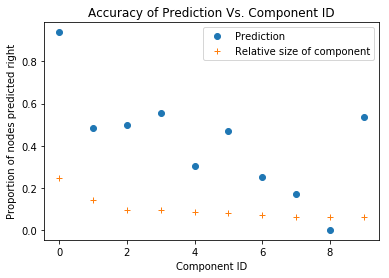

In [22]:
# Find accuracy as a function of component ID
componentIds = range(nComponents)
proportionRightByComponentId = np.zeros((nComponents))
for componentId in componentIds:
    proportionRightByComponentId[componentId]=\
    np.sum((predictionVsTruthNp[:,0] == componentIds[componentId])\
           *(predictionVsTruthNp[:,1] == componentIds[componentId])) \
    /np.sum((predictionVsTruthNp[:,0] == componentIds[componentId]))

plt.plot(proportionRightByComponentId,'o')
plt.plot([len(C)/nNodes for C in componentsNodeIds],'+')
plt.xlabel('Component ID')
plt.ylabel('Proportion of nodes predicted right')
plt.title('Accuracy of Prediction Vs. Component ID')
plt.legend(['Prediction','Relative size of component'])

We see that the prediction accuracy is affected by the component size, but the size alone is not enough to explain the accuracy.